
<font size = "13"><span style="color:#EFE1D1">
o(*￣︶￣*)o Linear Support Vector Classifier with Spark
</span></font>

In [1]:
# SVM with pyspark
from pyspark.ml.classification import LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
from params import Params
import warnings
warnings.filterwarnings("ignore")
xx, yy, yy_up, yy_down, support_vectors0, support_vectors1 = Params().params_loader()

In [2]:
import findspark
findspark.init()
spark = SparkSession.builder\
    .getOrCreate()

In [3]:
data = pd.read_csv('linear_separable_data.csv')
X = data[['x1', 'x2']].values
y = data['label'].values

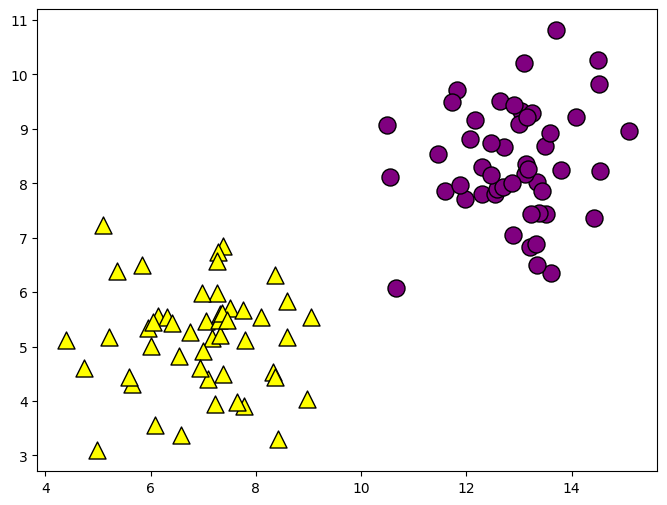

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', s=150, c='purple', edgecolors='black')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='^', s=150, c='yellow', edgecolors='black')
plt.show()

In [5]:
df = spark.createDataFrame(data)
df.show()

+----------+------------------+------------------+-----+
|Unnamed: 0|                x1|                x2|label|
+----------+------------------+------------------+-----+
|         0| 8.418319413979082|3.3064520818151317|    1|
|         1|13.202495165431335| 6.829244676726024|    0|
|         2| 5.638460361793802| 4.315117800698549|    1|
|         3| 7.509266259438954| 5.715913647848822|    1|
|         4| 7.256937754207785| 5.974676864776291|    1|
|         5|13.521943979282629| 7.427229860238088|    0|
|         6| 7.158581485951506| 5.165817475176218|    1|
|         7| 12.15870243547718| 9.170188524478798|    0|
|         8| 7.380183418937531| 6.841213215156731|    1|
|         9| 4.385553274900328| 5.112958260190711|    1|
|        10|12.298040118924565| 7.805450462682397|    0|
|        11| 7.314717294490431| 5.596358461963094|    1|
|        12| 5.831977995179868|6.4977425045489206|    1|
|        13| 7.222818244297199|  3.93548948189743|    1|
|        14|  6.75704979560042|

In [6]:
assembler = VectorAssembler().setInputCols(['x1','x2']).setOutputCol('features')
linear_svc = LinearSVC().setLabelCol('label').setFeaturesCol('features').setMaxIter(100).setRegParam(0.1)
pipeline = Pipeline().setStages([assembler, linear_svc])
linear_svc_pl = pipeline.fit(df)

In [7]:
print(f"""Model coefficients: {linear_svc_pl.stages[1].coefficients}
Model bias: {linear_svc_pl.stages[1].intercept}""")

Model coefficients: [-0.3046026660738616,-0.32219454249169593]
Model bias: 5.193711086130279



<font size = "12"><span style="color:#EFE1D1">
 \\(@^0^@)/ | $\Eta$: (-0.304) * x1 + (-0.322) * x2 + 5.193 = 0
</span></font>

In [10]:
def plot_SVC():
    plt.figure(1, figsize=(8, 6))
    plt.clf()
    plt.plot(xx, yy, "k-", linewidth=3)
    plt.plot(xx, yy_down, "b--", c='y', linewidth=2.5)
    plt.plot(xx, yy_up, "b--", c='purple', linewidth=2.5)
    plt.scatter(support_vectors0, support_vectors1, s=200,
                facecolors="none", zorder=10, edgecolors="k")
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='black')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.ylim(2, 12)
    plt.title("Support Vector Clasifier - Linear kernel - C = 1")
    plt.show()

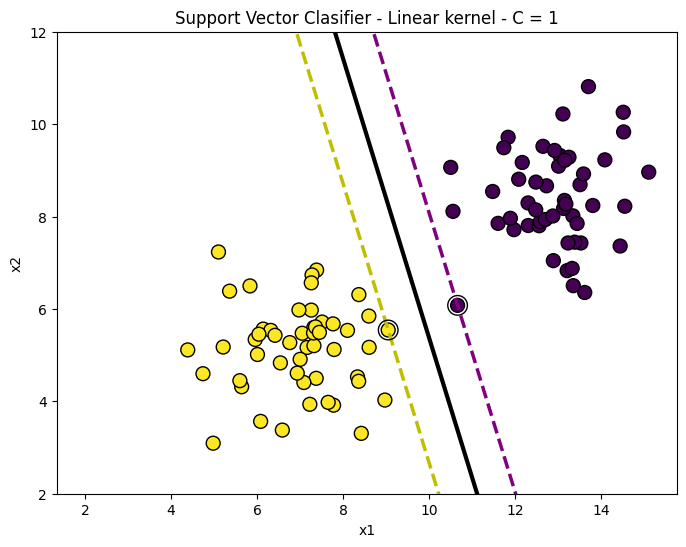

In [11]:
plot_SVC()